In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [14]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [16]:
from pandas import ExcelFile

In [17]:
df = pd.read_excel('VEF Historical Data.xlsx')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-07-01,130300,132900,132900,129000,7.20K,0.0062
1,2021-07-02,129900,128500,130900,128500,14.00K,-0.0031
2,2021-07-05,128500,129900,130000,128500,20.40K,-0.0108
3,2021-07-06,126200,128500,129400,126200,12.80K,-0.0179
4,2021-07-07,127500,127100,128900,125000,13.60K,0.0103


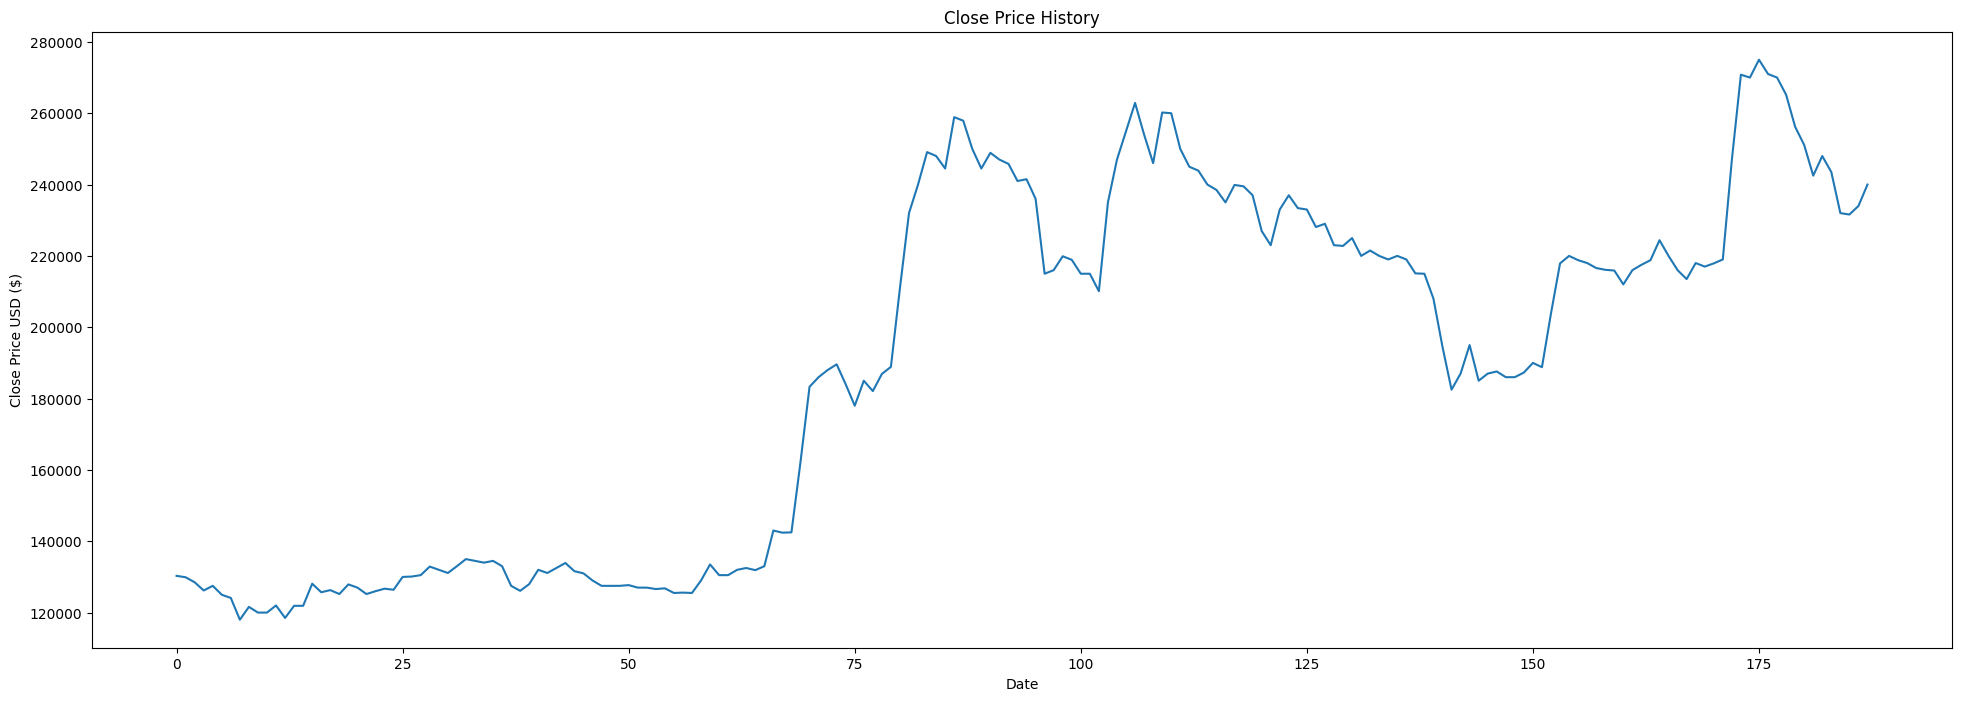

In [18]:
plt.figure(figsize=(24,8))
plt.title('Close Price History')
plt.plot(df['Price'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [19]:
# Create a new dataframe with only the 'Price column 
data = df.filter(['Price'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset)) - 62)

training_data_len

126

In [20]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.07834395],
       [0.07579618],
       [0.06687898],
       [0.0522293 ],
       [0.06050955],
       [0.04458599],
       [0.0388535 ],
       [0.        ],
       [0.02292994],
       [0.01273885],
       [0.01273885],
       [0.02547771],
       [0.00318471],
       [0.02484076],
       [0.02484076],
       [0.06433121],
       [0.04904459],
       [0.05286624],
       [0.04585987],
       [0.06305732],
       [0.05732484],
       [0.04585987],
       [0.05095541],
       [0.05541401],
       [0.05350318],
       [0.07643312],
       [0.07707006],
       [0.07961783],
       [0.09490446],
       [0.08917197],
       [0.08343949],
       [0.0955414 ],
       [0.10828025],
       [0.10509554],
       [0.10191083],
       [0.10509554],
       [0.0955414 ],
       [0.06050955],
       [0.05159236],
       [0.06369427],
       [0.08917197],
       [0.08343949],
       [0.09235669],
       [0.10127389],
       [0.0866242 ],
       [0.08280255],
       [0.07006369],
       [0.060

In [21]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

predictions_days = 60

for i in range(predictions_days, len(train_data)):
    x_train.append(train_data[i-predictions_days:i, 0])
    y_train.append(train_data[i, 0])
    if i<= (predictions_days + 1):
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.07834395, 0.07579618, 0.06687898, 0.0522293 , 0.06050955,
       0.04458599, 0.0388535 , 0.        , 0.02292994, 0.01273885,
       0.01273885, 0.02547771, 0.00318471, 0.02484076, 0.02484076,
       0.06433121, 0.04904459, 0.05286624, 0.04585987, 0.06305732,
       0.05732484, 0.04585987, 0.05095541, 0.05541401, 0.05350318,
       0.07643312, 0.07707006, 0.07961783, 0.09490446, 0.08917197,
       0.08343949, 0.0955414 , 0.10828025, 0.10509554, 0.10191083,
       0.10509554, 0.0955414 , 0.06050955, 0.05159236, 0.06369427,
       0.08917197, 0.08343949, 0.09235669, 0.10127389, 0.0866242 ,
       0.08280255, 0.07006369, 0.06050955, 0.06050955, 0.06050955,
       0.06178344, 0.05732484, 0.05732484, 0.05477707, 0.05605096,
       0.0477707 , 0.04840764, 0.0477707 , 0.07006369, 0.09872611])]
[0.07961783439490444]

[array([0.07834395, 0.07579618, 0.06687898, 0.0522293 , 0.06050955,
       0.04458599, 0.0388535 , 0.        , 0.02292994, 0.01273885,
       0.01273885, 0.02547771, 0.00

In [22]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=25)

Epoch 1/25
66/66 [==============================] - 3s 12ms/step - loss: 0.0376
Epoch 2/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0209
Epoch 3/25
66/66 [==============================] - 1s 11ms/step - loss: 0.0121
Epoch 4/25
66/66 [==============================] - 1s 11ms/step - loss: 0.0113
Epoch 5/25
66/66 [==============================] - 1s 11ms/step - loss: 0.0107
Epoch 6/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0087
Epoch 7/25
66/66 [==============================] - 1s 11ms/step - loss: 0.0066
Epoch 8/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0067
Epoch 9/25
66/66 [==============================] - 1s 11ms/step - loss: 0.0067
Epoch 10/25
66/66 [==============================] - 1s 11ms/step - loss: 0.0071
Epoch 11/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0060
Epoch 12/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0063
Epoch 13/25
66/66 [==================

In [23]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - predictions_days: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(predictions_days, len(test_data)):
    x_test.append(test_data[i-predictions_days:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 0s 16ms/step


11760.654253394396

C:\Users\DELL\AppData\Local\Temp\ipykernel_28304\2294235708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


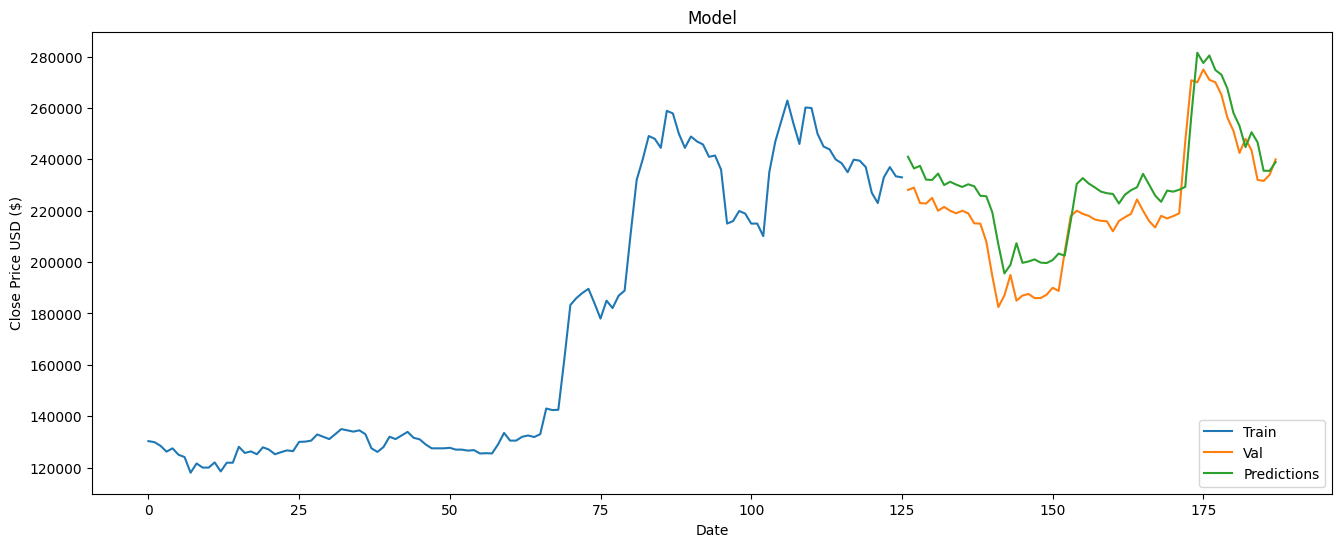

In [24]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()